In [1]:
import os
import re
import json
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
%matplotlib inline

from plotting import *
from molecule_rot import MoleculeRot

## Establish file paths and list of all molecule objects. Run before making any plots. 

In [2]:
home = os.path.abspath('/mnt/research/RotateDiheds/data')
master_dir = os.path.join(home,'masters/')
plot_dir = os.path.join(home, 'plots/')

all_molecules = make_all_mol_list(master_dir)
print("Done making all_molecules list.")  

# mol = MoleculeRot('mols_66_5_00_c-c-c-c', master_dir)
# mol.plot_torsion_energy()

Done making all_molecules list.


In [3]:
import pandas as pd

In [12]:
data = pd.DataFrame()
for i, mol in enumerate(all_molecules):
    try:
        energy = pd.DataFrame(mol.energy_dict.values(),index=mol.energy_dict.keys(), columns=['energy'])
    except AttributeError: 
        energy = None
    try: 
        homo_lumo_init = pd.DataFrame([mol.homo_dict, mol.lumo_dict], index=['homo_energy','lumo_energy'])
        homo_lumo = homo_lumo_init.T
    except AttributeError: 
        homo_lumo = None
#     try:
#         min_e_angle = mol.get_angle_from_energy
#     except AttributeError: 
#         min_e_angle = None
#     try:
#         cent_dihed = pd.DataFrame(mol.central_bond_length_dict.values(),index=mol.central_bond_length_dict.keys(), columns=['dihedral1','dihedral2'])
#         print(cent_dihed)
#     except AttributeError: 
#         cent_dihed = None
    mol_data = {'name': mol.name, 
                'ring_num': mol.ring_num,
                'unit_num': mol.unit_num,
                'polymer_num': mol.polymer_num,
                'chromophore': mol.chromophore,
                'substituents': (mol.substituents).upper(),
                'side_chains': mol.side_chains,
                'tuned_omega': mol.tuned_omega,
                'smiles': mol.smiles,
#                 'central_dihedrals': mol.cent_diheds,
                'energy': energy,
                'homo_lumo': homo_lumo, 
                'min_e_angle': mol.unconst_angle
               }
    data = data.append(mol_data, ignore_index=True) 

data['molecule'] = data.apply(lambda x: '{:.0f}_{:.0f}'.format(x['ring_num'],x['polymer_num']), axis=1)
data['tuned_omega'] = data.apply(lambda x: "0."+x.tuned_omega[1:] if pd.notna(x.tuned_omega) else np.nan, axis=1)
data['adjusted_min_e_angle'] = data.apply(lambda x: abs(90 - x.min_e_angle) if pd.notna(x.min_e_angle) else np.nan, axis=1)
data

,chromophore,energy,homo_lumo,min_e_angle,name,polymer_num,ring_num,side_chains,smiles,substituents,tuned_omega,unit_num,molecule,adjusted_min_e_angle
0,bithiophene,energy 0.0 -31416.294093 10.0 ...,homo_energy lumo_energy 0.0 -9.56...,179.999942,mols_55_1_00_C-C,0.0,55.0,(),C1=CC=C(S1)C2=CC=C(S2),C-C,0.3136343090733901,1.0,55_0,89.999942
1,bithiophene,energy 0.0 -33992.046931 10.0 ...,homo_energy lumo_energy 0.0 -9.31...,179.999978,mols_55_1_01_C-CF,1.0,55.0,"(F,)",C1=CC=C(S1)C2=C(F)C=C(S2),C-CF,0.07742594210469167,1.0,55_1,89.999978
2,thienyl_thiazole,energy 0.0 -31174.061336 10.0 ...,homo_energy lumo_energy 0.0 -9.46...,179.999911,mols_55_1_02_C-N,2.0,55.0,(),C1=CC=C(S1)C2=NC=C(S2),C-N,0.319333169297177,1.0,55_2,89.999911
3,bithiophene,energy 0.0 -35011.184094 10.0 ...,homo_energy lumo_energy 0.0 -9.92...,179.999967,mols_55_1_03_C-COC,3.0,55.0,"(OCH3,)",C1=CC=C(S1)C2=C(OC)C=C(S2),C-COC,0.30578853440960657,1.0,55_3,89.999967
4,bithiophene,energy 0.0 -37455.795513 10.0 ...,homo_energy lumo_energy 0.0 -10.84...,180.0,mols_55_1_04_CF-CF,4.0,55.0,"(F, F)",C1=CC(F)=C(S1)C2=C(F)C=C(S2),CF-CF,0.22087085952750812,1.0,55_4,90.000000
5,thienyl_thiazole,energy 0.0 -33926.967821 10.0 ...,homo_energy lumo_energy 0.0 -9.58...,179.999955,mols_55_1_05_CF-N,5.0,55.0,"(F,)",C1=CC(F)=C(S1)C2=NC=C(S2),CF-N,0.10723482993828576,1.0,55_5,89.999955
6,bithiophene,energy 0.0 -37024.113995 10.0 ...,homo_energy lumo_energy 0.0 -8.74...,179.999989,mols_55_1_06_CF-COC,6.0,55.0,"(F, OCH3)",C1=CC(F)=C(S1)C2=C(OC)C=C(S2),CF-COC,0.2940544040085928,1.0,55_6,89.999989
7,bithiazole,energy 0.0 -32078.139339 10.0 ...,homo_energy lumo_energy 0.0 -10.14...,180.0,mols_55_1_07_N-N,7.0,55.0,(),C1=CN=C(S1)C2=NC=C(S2),N-N,0.41682182666594086,1.0,55_7,90.000000
8,thienyl_thiazole,energy 0.0 -33895.687072 10.0 ...,homo_energy lumo_energy 0.0 -9.01...,179.99999,mols_55_1_08_N-COC,8.0,55.0,"(OCH3,)",C1=CN=C(S1)C2=C(OC)C=C(S2),N-COC,0.27237345899988297,1.0,55_8,89.999990
9,bithiophene,energy 0.0 -36813.822676 10.0 ...,homo_energy lumo_energy 0.0 -8.21...,180.0,mols_55_1_09_COC-COC,9.0,55.0,"(OCH3, OCH3)",C1=CC(OC)=C(S1)C2=C(OC)C=C(S2),COC-COC,0.14164753230799287,1.0,55_9,90.000000


In [13]:
data.iloc[32:33]

,chromophore,energy,homo_lumo,min_e_angle,name,polymer_num,ring_num,side_chains,smiles,substituents,tuned_omega,unit_num,molecule,adjusted_min_e_angle
32,thienyl_thiazole,None,homo_energy lumo_energy 0 None ...,None,mols_55_7_02_C-N,2.0,55.0,(),C1=CC=C(S1)C2=NC=C(S2)C1=CC=C(S1)C2=NC=C(S2)C1...,C-N,NaN,7.0,55_2,NaN


In [14]:
pd.set_option('display.max_rows', None)

# data.replace(np.nan)
type(data.iloc[32].energy)

NoneType

mols_65_1_39_cOC-cOC-COC    0.48983348131764637
mols_65_3_39_cOC-cOC-COC    0.47867193786290385
mols_65_5_39_cOC-cOC-COC     0.1958719303553264
mols_65_7_39_cOC-cOC-COC                    NaN
Name: tuned_omega, dtype: object
mols_65_1_39_cOC-cOC-COC    120.000083
mols_65_3_39_cOC-cOC-COC     55.733294
mols_65_5_39_cOC-cOC-COC    130.000015
mols_65_7_39_cOC-cOC-COC          None
Name: min_e_angle, dtype: object


,chromophore,energy,homo_lumo,min_e_angle,name,polymer_num,ring_num,side_chains,smiles,substituents,tuned_omega,unit_num,molecule,adjusted_min_e_angle
mols_65_1_39_cOC-cOC-COC,phenyl_thiophene,energy 0.0 -31080.626659 10.0 ...,homo_energy lumo_energy 0.0 -8.22...,120.000083,mols_65_1_39_cOC-cOC-COC,39.0,65.0,"(OCH3, OCH3, OCH3)",c1cc(OC)c(c(OC)c1)C2=C(OC)C=C(S2),COC-COC-COC,0.48983348131764637,1.0,65_39,30.000083
mols_65_3_39_cOC-cOC-COC,phenyl_thiophene,energy 0.0 -93245.222431 10.0 ...,homo_energy lumo_energy 0.0 -7.69...,55.733294,mols_65_3_39_cOC-cOC-COC,39.0,65.0,"(OCH3, OCH3, OCH3)",c1cc(OC)c(c(OC)c1)C2=C(OC)C=C(S2)c1cc(OC)c(c(O...,COC-COC-COC,0.47867193786290385,3.0,65_39,34.266706
mols_65_5_39_cOC-cOC-COC,phenyl_thiophene,energy 0.0 -157311.406582 10.0...,homo_energy lumo_energy 0.0 -7.58...,130.000015,mols_65_5_39_cOC-cOC-COC,39.0,65.0,"(OCH3, OCH3, OCH3)",c1cc(OC)c(c(OC)c1)C2=C(OC)C=C(S2)c1cc(OC)c(c(O...,COC-COC-COC,0.1958719303553264,5.0,65_39,40.000015
mols_65_7_39_cOC-cOC-COC,phenyl_thiophene,None,homo_energy lumo_energy 0 None ...,None,mols_65_7_39_cOC-cOC-COC,39.0,65.0,"(OCH3, OCH3, OCH3)",c1cc(OC)c(c(OC)c1)C2=C(OC)C=C(S2)c1cc(OC)c(c(O...,COC-COC-COC,NaN,7.0,65_39,NaN


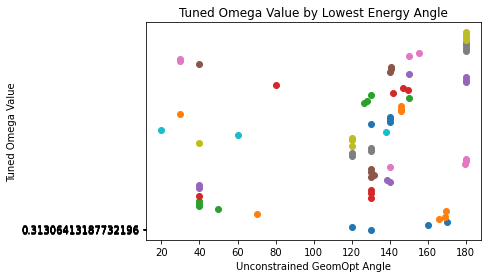

In [27]:
out_dir = os.path.join(plot_dir,'other/')
molecules = set(data.molecule)

color_dict = {1: 'k', 3: 'c', 5: 'm', 7: 'y'}
fig, ax = plt.subplots()
for mol in molecules: 
    mols = data.loc[data.molecule == mol]
    mols = mols.rename(index=mols.name)
    try:
        ax.scatter(mols.min_e_angle, mols.tuned_omega, label=mol)
    except:
        print(mols.tuned_omega)
        print(mols.min_e_angle)
        df = pd.DataFrame(mols)
        break
#     ax.plot(mols.unit_num, mols.tuned_omega)
# fig.legend(bbox_to_anchor=(1.07, 1))
ax.set_xlabel('Unconstrained GeomOpt Angle')
ax.set_yticks(np.linspace(start=0, stop=0.5, num=6))
ax.set_ylabel('Tuned Omega Value')
ax.set_title('Tuned Omega Value by Lowest Energy Angle')
fig.patch.set_facecolor("w")
# fig.savefig(out_dir + 'Omega_MinEAngle.png', dpi=300, bbox_inches='tight')
mols

{'bithiazole', 'thienyl_pyrimidine', 'phenyl_thiophene', 'phenyl_pyridine', 'thienyl_pyridine', 'pyridyl_thiazole', 'bithiophene', 'thiazolyl_pyrimidine', 'bypyridyl', 'thienyl_thiazole', 'biphenyl', 'phenyl_thiazole'}


TypeError: 'value' must be an instance of str or bytes, not a float

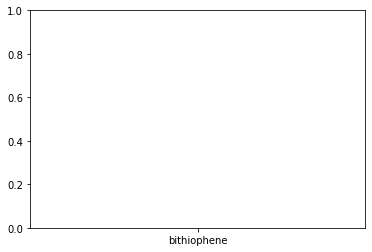

In [16]:
def string(x): 
    try:
        return str(re.findall('\(([^)]+)', str(x)))
    except TypeError: 
        return np.nan

fig, ax = plt.subplots()  
out_dir = os.path.join(plot_dir,'other/')
small_data = data.filter(['chromophore','tuned_omega'], axis=1)
small_data.chromophore = small_data.apply(lambda x: str(x.chromophore), axis=1)
print(set(small_data.chromophore))
ax.scatter(small_data.chromophore, small_data.tuned_omega)
#     ax.plot(mols.unit_num, mols.tuned_omega)
# fig.legend(bbox_to_anchor=(1.07, 1))
ax.set_xlabel('Chromophore')
ax.tick_params(labelrotation=75)
ax.set_ylabel('Tuned Omega Value')
ax.set_title('Tuned Omega Value by Chromophore')
fig.patch.set_facecolor("w")
fig.savefig(out_dir + 'Omega_Chromophore.png', dpi=300, bbox_inches='tight')

## Make plot for each unit of each polymer

In [4]:
energy_out_dir = os.path.join(plot_dir,'energy/')
hl_out_dir = os.path.join(plot_dir,'homo_lumo/')
    t
for mol in all_molecules:
    try: 
        mol.plot_torsion_energy(energy_out_dir)
        mol.plot_homo_lumo(hl_out_dir)
    #     mol.write_nnff_json(os.path.join(home,'jsons/'))
        print('Done plotting {}'.format(mol.name))
    except:
        print("Error plotting {}".format(mol.name))

Done plotting mols_66_1_08_n-n-c-cOC
Done plotting mols_65_5_16_n-n-C
Done plotting mols_65_1_22_n-cF-CF
Done plotting mols_65_3_27_n-cOC-COC
Done plotting mols_66_1_09_c-c-cF-cF
Done plotting mols_65_5_01_c-c-N
Done plotting mols_65_5_14_c-cOC-CF
Done plotting mols_66_7_17_n-n-cOC-cOC
Done plotting mols_65_1_27_n-cOC-COC
Done plotting mols_66_7_13_c-n-cF-cOC
Done plotting mols_66_7_01_c-n-c-c
Done plotting mols_65_1_12_c-cOC-C
Done plotting mols_65_1_13_c-cOC-N
Done plotting mols_65_7_07_c-n-COC
Done plotting mols_65_5_13_c-cOC-N
Done plotting mols_65_3_11_c-cF-COC
Done plotting mols_66_3_16_c-n-cOC-cOC
Done plotting mols_65_5_31_cF-cF-COC
Done plotting mols_65_7_04_c-n-C
Done plotting mols_66_7_09_c-c-cF-cF
Done plotting mols_66_3_17_n-n-cOC-cOC
Done plotting mols_65_5_04_c-n-C
Done plotting mols_65_7_25_n-cOC-N
Done plotting mols_55_1_01_C-CF
Done plotting mols_66_1_06_c-c-c-cOC
Done plotting mols_55_5_00_C-C
Done plotting mols_66_7_11_n-n-cF-cF
Done plotting mols_65_7_19_n-n-COC
Do

Done plotting mols_65_1_09_c-cF-N
Done plotting mols_65_3_24_n-cOC-C
Done plotting mols_65_3_21_n-cF-N
Done plotting mols_66_5_05_n-n-c-cF
Done plotting mols_65_3_13_c-cOC-N
Done plotting mols_65_7_00_c-c-C
Done plotting mols_66_3_15_c-c-cOC-cOC
Done plotting mols_65_3_12_c-cOC-C
Done plotting mols_65_7_20_n-cF-C
Done plotting mols_65_3_33_cF-cOC-N
Done plotting mols_65_3_19_n-n-COC
Done plotting mols_55_3_06_CF-COC
Done plotting mols_66_5_11_n-n-cF-cF
Done plotting mols_65_5_35_cF-cOC-COC
Done plotting mols_66_5_12_c-c-cF-cOC
Done plotting mols_65_7_37_cOC-cOC-N
Done plotting mols_65_5_03_c-c-COC
Done plotting mols_66_5_10_c-n-cF-cF
Done plotting mols_65_1_06_c-n-CF
Done plotting mols_66_3_08_n-n-c-cOC
Done plotting mols_55_3_08_N-COC
Done plotting mols_65_5_07_c-n-COC
Done plotting mols_65_5_02_c-c-CF
Done plotting mols_55_1_08_N-COC
Done plotting mols_65_1_29_cF-cF-N
Done plotting mols_65_1_04_c-n-C
Done plotting mols_65_3_15_c-cOC-COC
Done plotting mols_65_3_34_cF-cOC-CF
Done plott

## Make overlay plot for each polymer

In [3]:
out_dir = os.path.join(plot_dir,'overlay/')#_homo_lumo/')
omega_dir = os.path.join(plot_dir, 'omega/')
ring_type = [55,65,66]
for r in ring_type:
    i = 0
    while i <= 40:
        unit_overlay_list = make_small_mol_list(all_molecules,ring_num=r, polymer_num=i)
        try: 
            first_mol = unit_overlay_list[0]
            mol_name = "mol_{}__{}_{}".format(first_mol.ring_num, first_mol.polymer_num,first_mol.substituents)
    #             overlay_energy_plot(unit_overlay_list,mol_name,out_dir=out_dir,draw_1unit=True)
            plot_omega(unit_overlay_list,mol_name,out_dir=omega_dir,draw_1unit=True, varying_attribute='name')
            print('Done plotting overlay for {}'.format(mol_name))

            i += 1
        except IndexError:
            break 
        except: 
            i += 1
            print('Error plotting overlay for {} rings and {} polymer number'.format(r,i))

Done plotting overlay for mol_55__0_C-C
Done plotting overlay for mol_55__1_C-CF
Done plotting overlay for mol_55__2_C-N
Done plotting overlay for mol_55__3_C-COC
Done plotting overlay for mol_55__4_CF-CF
Done plotting overlay for mol_55__5_CF-N
Done plotting overlay for mol_55__6_CF-COC
Done plotting overlay for mol_55__7_N-N
Done plotting overlay for mol_55__8_N-COC
Done plotting overlay for mol_55__9_COC-COC
Done plotting overlay for mol_65__0_c-c-C
Done plotting overlay for mol_65__1_c-c-N
Done plotting overlay for mol_65__2_c-c-CF
Done plotting overlay for mol_65__3_c-c-COC
Done plotting overlay for mol_65__4_c-n-C
Done plotting overlay for mol_65__5_c-n-N
Done plotting overlay for mol_65__6_c-n-CF
Done plotting overlay for mol_65__7_c-n-COC
Done plotting overlay for mol_65__8_c-cF-C
Done plotting overlay for mol_65__9_c-cF-N
Done plotting overlay for mol_65__10_c-cF-CF
Done plotting overlay for mol_65__11_c-cF-COC
Done plotting overlay for mol_65__12_c-cOC-C
Done plotting overlay

## Make average plots for each unit size

In [ ]:
out_dir = os.path.join(plot_dir,'other/')
unit_nums = [1,3,5,7]
for u in unit_nums:
#     try:
    unit_list = make_small_mol_list(all_molecules,unit_num=u)
    average_plot(unit_list, str(u)+'_subunits', out_dir)
    overlay_energy_plot(unit_list,str(u)+'_subunits',out_dir,legend_outside=False)
    print('Done plotting average energies for {} units'.format(u))
#     except:
#         print('Error plotting average energies for {} units'.format(u))

# Specific Plots

In [3]:
chromophores = set()
side_chains = set()
for mol in all_molecules: 
    chromophores.add(mol.chromophore)
    try: 
        side_chains.add((mol.side_chain))
    except: 
        pass
    
print(chromophores)
print(side_chains)

{'thienyl_pyrimidine', 'phenyl_thiophene', 'bithiophene', 'thiazolyl_pyrimidine', 'bithiazole', 'phenyl_thiazole', 'thienyl_pyridine', 'biphenyl', 'thienyl_thiazole', 'pyridyl_thiazole', 'bypyridyl', 'phenyl_pyridine'}
{('F', 'OCH3', 'OCH3'), ('OCH3', 'OCH3'), ('OCH3', 'OCH3', 'OCH3'), ('F', 'F'), ('F', 'OCH3'), ('F',), (), ('F', 'F', 'F'), ('OCH3',), ('F', 'F', 'OCH3')}


Make plots comparing molecules with the same cromophore ring structure

In [4]:
out_dir = os.path.join(plot_dir,'other/','chromophores/')
for crom in chromophores: 
    try:
        ring_overlay_list = make_small_mol_list(all_molecules,chromophore=crom)
        overlay_energy_plot(ring_overlay_list,'chromophores_{}_plt'.format(crom),out_dir,varying_attribute='chromophore_side')
        average_plot(ring_overlay_list,'chromophores_{}_plt'.format(crom),out_dir)
    except: 
        pass



Number of molecules averaged: 12
Error. Did not plot norm_energy_dict.keys() and norm_energy_dict.values() for chromophore_side phenyl_thiophene, ('OCH3', 'OCH3', 'OCH3') in chromophores_phenyl_thiophene_plt.
Error. Did not find energy for mols_65_7_35_cF-cOC-COC at 0.0 degree rotation.
Error. Did not find energy for mols_65_7_39_cOC-cOC-COC at 0.0 degree rotation.
Error. Did not find energy for mols_65_7_35_cF-cOC-COC at 10.0 degree rotation.
Error. Did not find energy for mols_65_7_39_cOC-cOC-COC at 10.0 degree rotation.
Error. Did not find energy for mols_65_7_39_cOC-cOC-COC at 20.0 degree rotation.
Error. Did not find energy for mols_65_7_39_cOC-cOC-COC at 30.0 degree rotation.
Error. Did not find energy for mols_65_7_39_cOC-cOC-COC at 40.0 degree rotation.
Error. Did not find energy for mols_65_7_39_cOC-cOC-COC at 50.0 degree rotation.
Error. Did not find energy for mols_65_7_39_cOC-cOC-COC at 60.0 degree rotation.
Error. Did not find energy for mols_65_5_32_cF-cOC-C at 70.0 deg

Error. Did not find energy for mols_65_7_27_n-cOC-COC at 0.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 10.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 20.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 30.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 40.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 60.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 70.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 80.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 100.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 120.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 130.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 140.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC

Make plots comaring molecules with the same substituents

In [5]:
out_dir = os.path.join(plot_dir,'other/','side_chains/')
for side in side_chains: 
    try:
        ring_overlay_list = make_small_mol_list(all_molecules,side_chain=side)
        overlay_energy_plot(ring_overlay_list,'side_chains_{}_plt'.format(side),out_dir,varying_attribute='chromophore_side')
        average_plot(ring_overlay_list,'side_chains_{}_plt'.format(side),out_dir)
    except: 
        pass

Error. Did not find energy for mols_65_7_35_cF-cOC-COC at 0.0 degree rotation.
Error. Did not find energy for mols_65_7_35_cF-cOC-COC at 10.0 degree rotation.
Error. Did not find energy for mols_65_7_35_cF-cOC-COC at 90.0 degree rotation.
Error. Did not find energy for mols_65_5_35_cF-cOC-COC at 110.0 degree rotation.
Error. Did not find energy for mols_65_7_35_cF-cOC-COC at 160.0 degree rotation.
Error. Did not find energy for mols_65_7_35_cF-cOC-COC at 180.0 degree rotation.


Number of molecules averaged: 8
Error. Did not plot norm_energy_dict.keys() and norm_energy_dict.values() for chromophore_side biphenyl, ('OCH3', 'OCH3') in side_chains_('OCH3', 'OCH3')_plt.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 0.0 degree rotation.
Error. Did not find energy for mols_66_7_15_c-c-cOC-cOC at 0.0 degree rotation.
Error. Did not find energy for mols_65_7_27_n-cOC-COC at 10.0 degree rotation.
Error. Did not find energy for mols_66_7_15_c-c-cOC-cOC at 10.0 degree rotation.
Error. 

Error. Did not find energy for mols_55_7_05_CF-N at 0.0 degree rotation.
Error. Did not find energy for mols_55_5_05_CF-N at 10.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 10.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 20.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 30.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 40.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 50.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 60.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 70.0 degree rotation.
Error. Did not find energy for mols_65_5_21_n-cF-N at 70.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 80.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 90.0 degree rotation.
Error. Did not find energy for mols_55_7_05_CF-N at 100.0 degree rotation.
Error. Did not find energy for mols_



Number of molecules averaged: 8
